Nama : Putri Rezita Amelia <br>
NIM : 211351114 <br>
Kelas : Pagi B

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amelia17","key":"33b66c0e0891cc08a7d1d250620a3f4f"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 5.30MB/s]


In [4]:
!mkdir customer-segmentation-tutorial-in-python
!unzip customer-segmentation-tutorial-in-python.zip -d customer-segmentation-tutorial-in-python
!ls customer-segmentation-tutorial-in-python

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: customer-segmentation-tutorial-in-python/Mall_Customers.csv  
Mall_Customers.csv


# import library yang digunakan

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import plotly.graph_objs as go
from sklearn.cluster import KMeans

In [55]:
df = pd.read_csv('Mall_Customers.csv')

# Data Discovery

In [56]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [65]:
df.rename(index=str,columns={
    'Annual Income (k$)' : 'Income' , 'Spending Score (1-100)' : 'Score'
}, inplace=True)

In [66]:
x = df.iloc[:,[2,3,4]].values

# EDA (minimal 5)

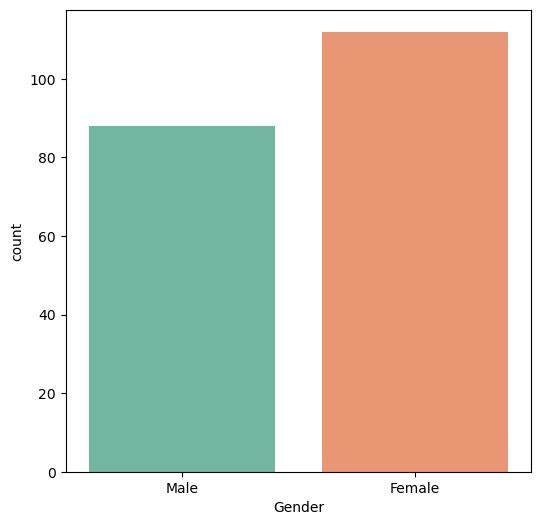

In [59]:
plt.figure(1 , figsize = (6 , 6))
sns.countplot(x = 'Gender' , data = df, palette='Set2')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9764\2256065445.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




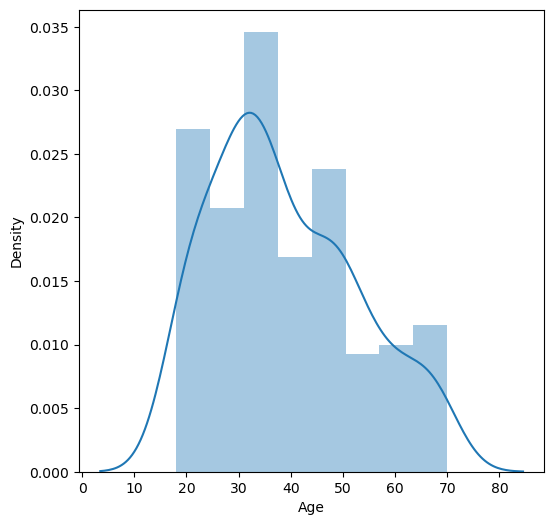

In [60]:
plt.figure(figsize=(6, 6))
sns.distplot(df["Age"])
plt.xlabel("Age")
plt.show()

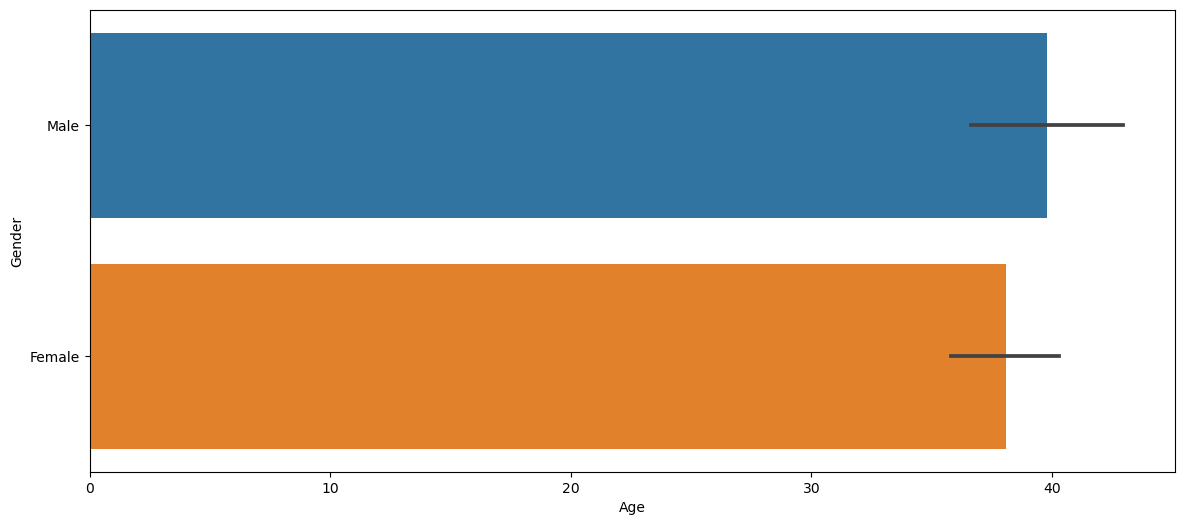

In [61]:
plt.figure(figsize = (14,6))
sns.barplot(data=df, x="Age", y="Gender")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9764\2966456124.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



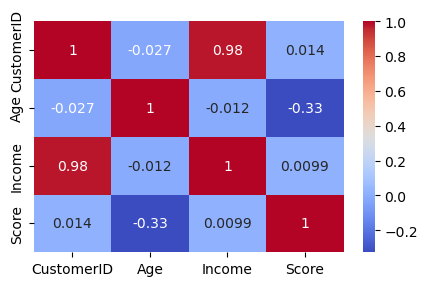

In [62]:
corr_matrix = df.corr()

plt.figure(figsize = (5, 3))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 cmap = 'coolwarm')

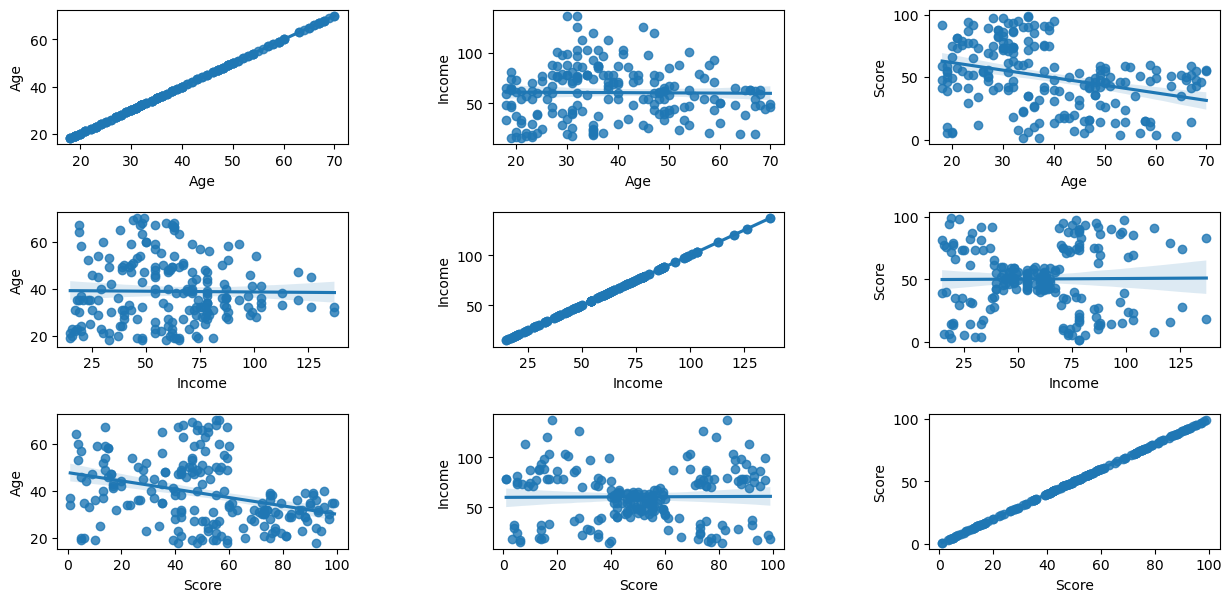

In [63]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Income' , 'Score']:
    for y in ['Age' , 'Income' , 'Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

# Preprocessing

c:\Users\user\anaconda.3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\user\anaconda.3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\user\anaconda.3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\user\anaconda.3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\u

Text(5, 100000, 'Posibble Elbow Point')

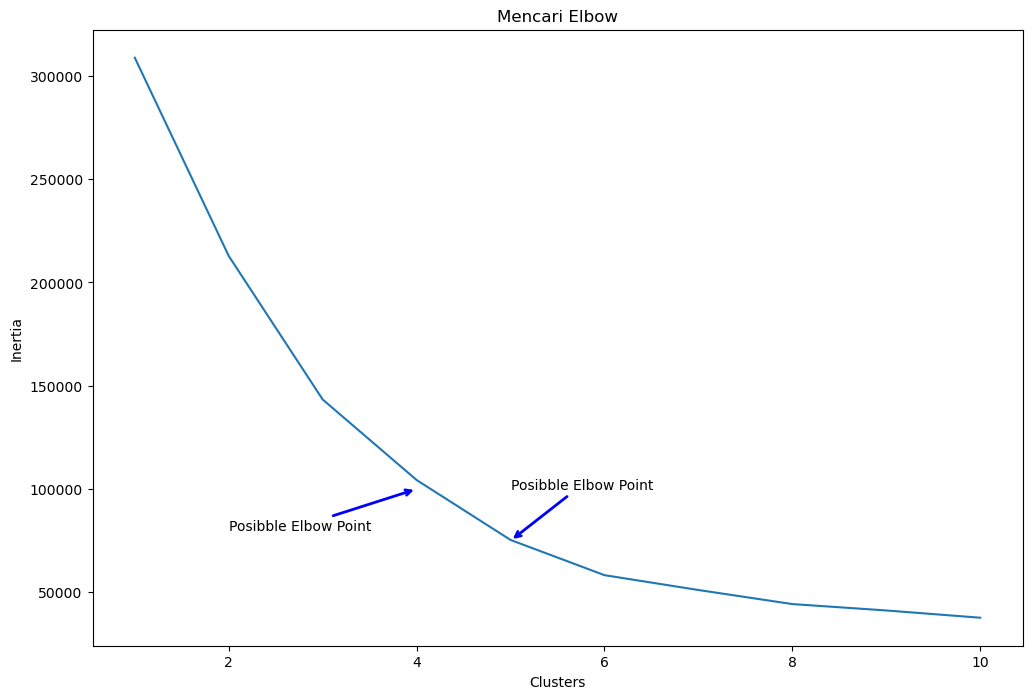

In [67]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)),y=clusters,ax=ax)
ax.set_title('Mencari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

ax.annotate('Posibble Elbow Point', xy=(4,100000), xytext=(2,80000), xycoords='data',
            arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='blue',lw=2))
ax.annotate('Posibble Elbow Point', xy=(5,75000), xytext=(5,100000), xycoords='data',
            arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='blue',lw=2))

# modeling

In [68]:
n_clust = 5
kmean =KMeans(n_clusters=n_clust, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = kmean.fit_predict(x)

c:\Users\user\anaconda.3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



# Visualisasi hasil algoritma

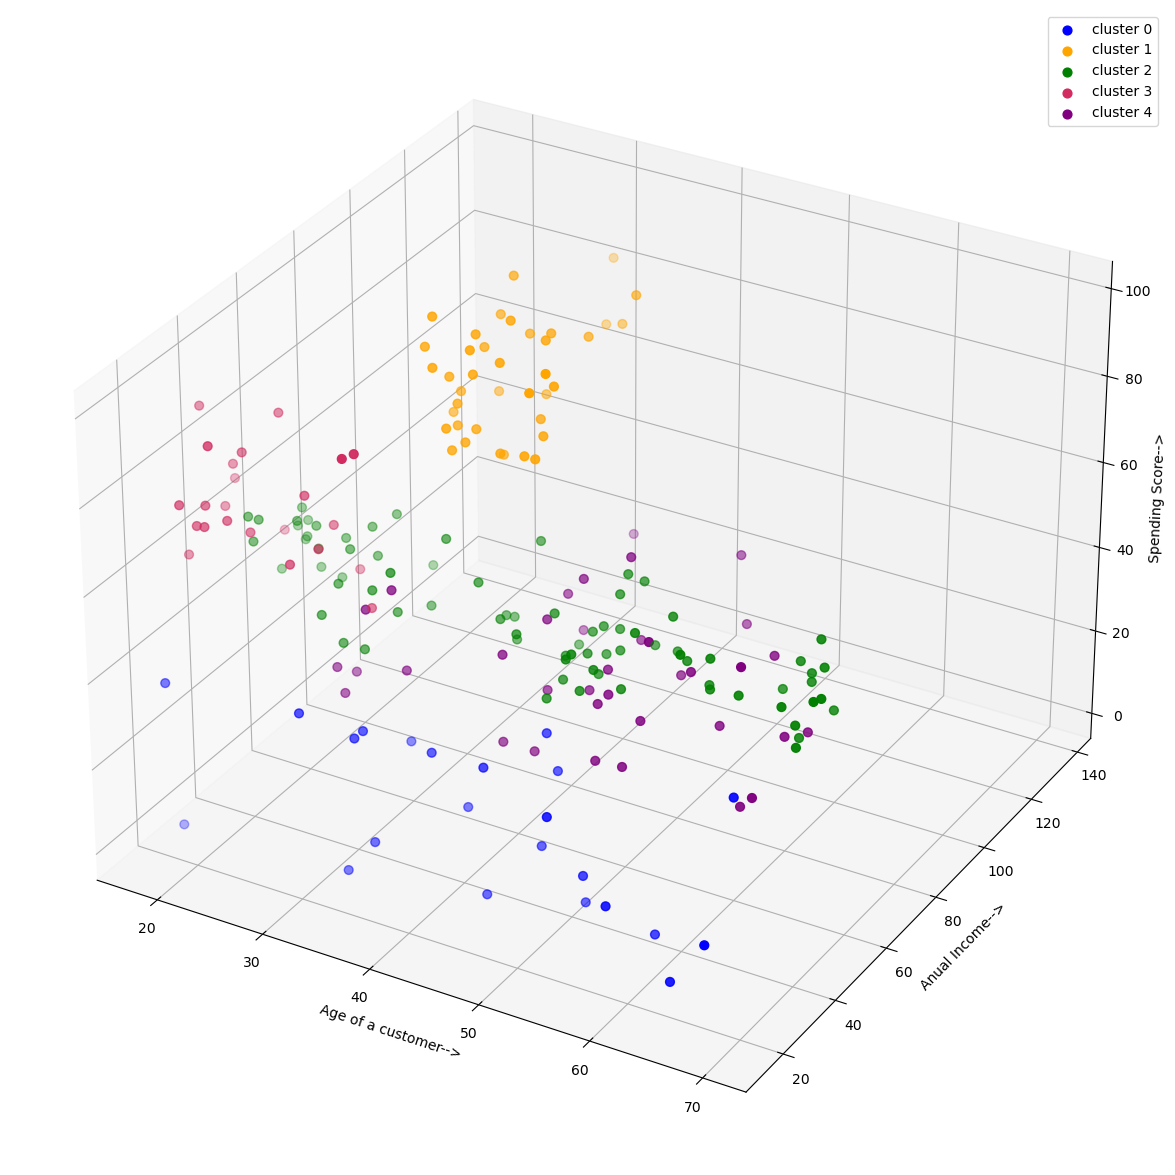

In [69]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()

In [71]:
Scene = dict(xaxis = dict(title  = 'Age -->'),yaxis = dict(title  = 'Spending Score--->'),zaxis = dict(title  = 'Annual Income-->'))

labels = kmean.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [73]:
clusteringdata = pd.DataFrame(x, columns=['Age', 'Income', 'Score'])
clusteringdata['Labels']=kmean.labels_
clusteringdata

,Age,Income,Score,Labels
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,4
197,32,126,74,1
198,32,137,18,4


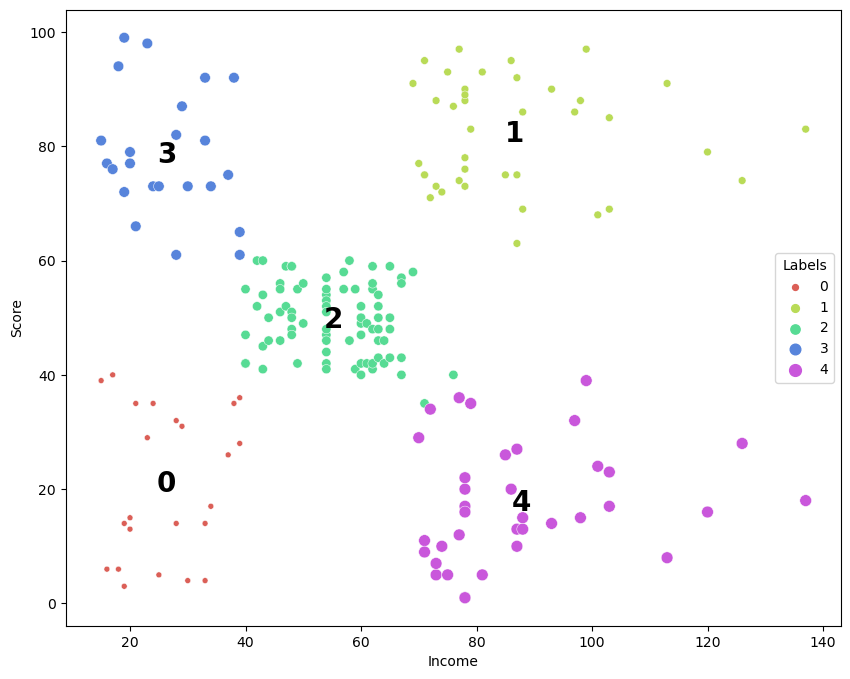

In [75]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Income', y='Score', hue='Labels', marker='o', size='Labels', palette=sns.color_palette('hls', n_colors=n_clust), data=clusteringdata)

for label in clusteringdata['Labels'].unique():
    plt.annotate(label,
                 (clusteringdata[clusteringdata['Labels']==label]['Income'].mean(),
                  clusteringdata[clusteringdata['Labels']==label]['Score'].mean()),
                  horizontalalignment='center',
                  verticalalignment='center',
                  size=20, weight='bold',
                  color='black')


# save model (pickle)

In [27]:
clusteringdata.to_excel("FinalData.xlsx")
from google.colab import files
files.download("FinalData.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
filename = 'kmeans.sav'
pickle.dump(kmean, open(filename, 'wb'))
from google.colab import files
files.download('kmeans.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>